In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

# ***Heirarchical Clustering***

In [2]:
# Importing libraries for Heirarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Means-Clustering/main/crime_data.csv")

In [4]:
data.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [5]:
data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Normalizing Function

def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [8]:
data=data.set_index('State')

In [9]:
data

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [10]:
norm_data=norm_func(data)

In [11]:
norm_data

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465
Colorado,0.427711,0.544521,0.779661,0.811370
Connecticut,0.150602,0.222603,0.762712,0.098191
Delaware,0.307229,0.660959,0.677966,0.219638
Florida,0.879518,0.993151,0.813559,0.635659


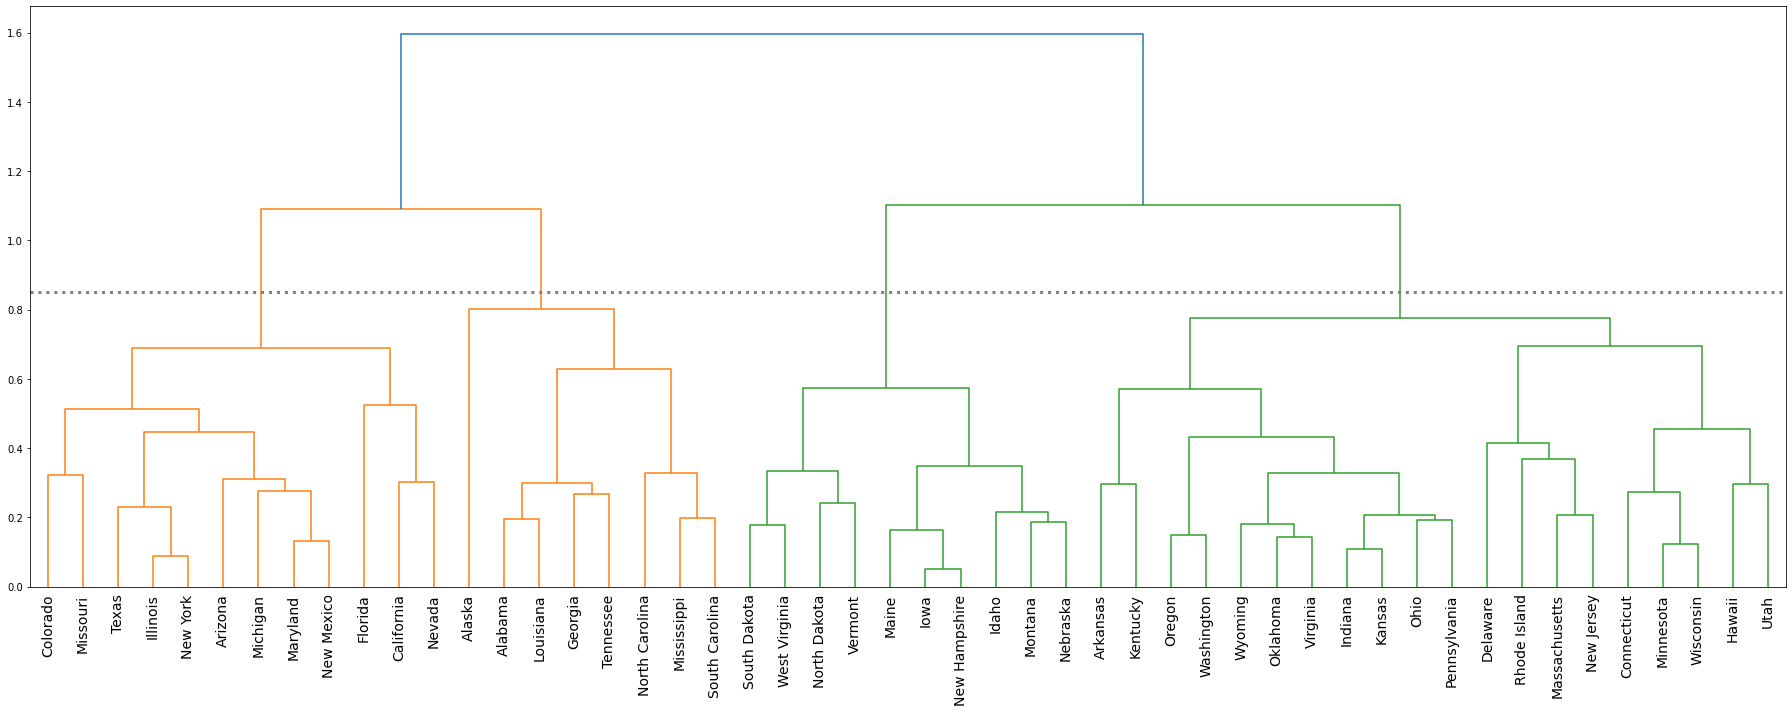

In [12]:
# Dendrogram
plt.figure(figsize=(25,10))
plt.axhline(y=0.85,c='gray',lw=3,linestyle=':')
dendrogram=sch.dendrogram(sch.linkage(norm_data,method='complete'),orientation='top',labels=data.index,leaf_font_size=14)
plt.tight_layout()


## Choosing the Number of Clusters

> The best choice of the no. of cluster s is thre number of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.




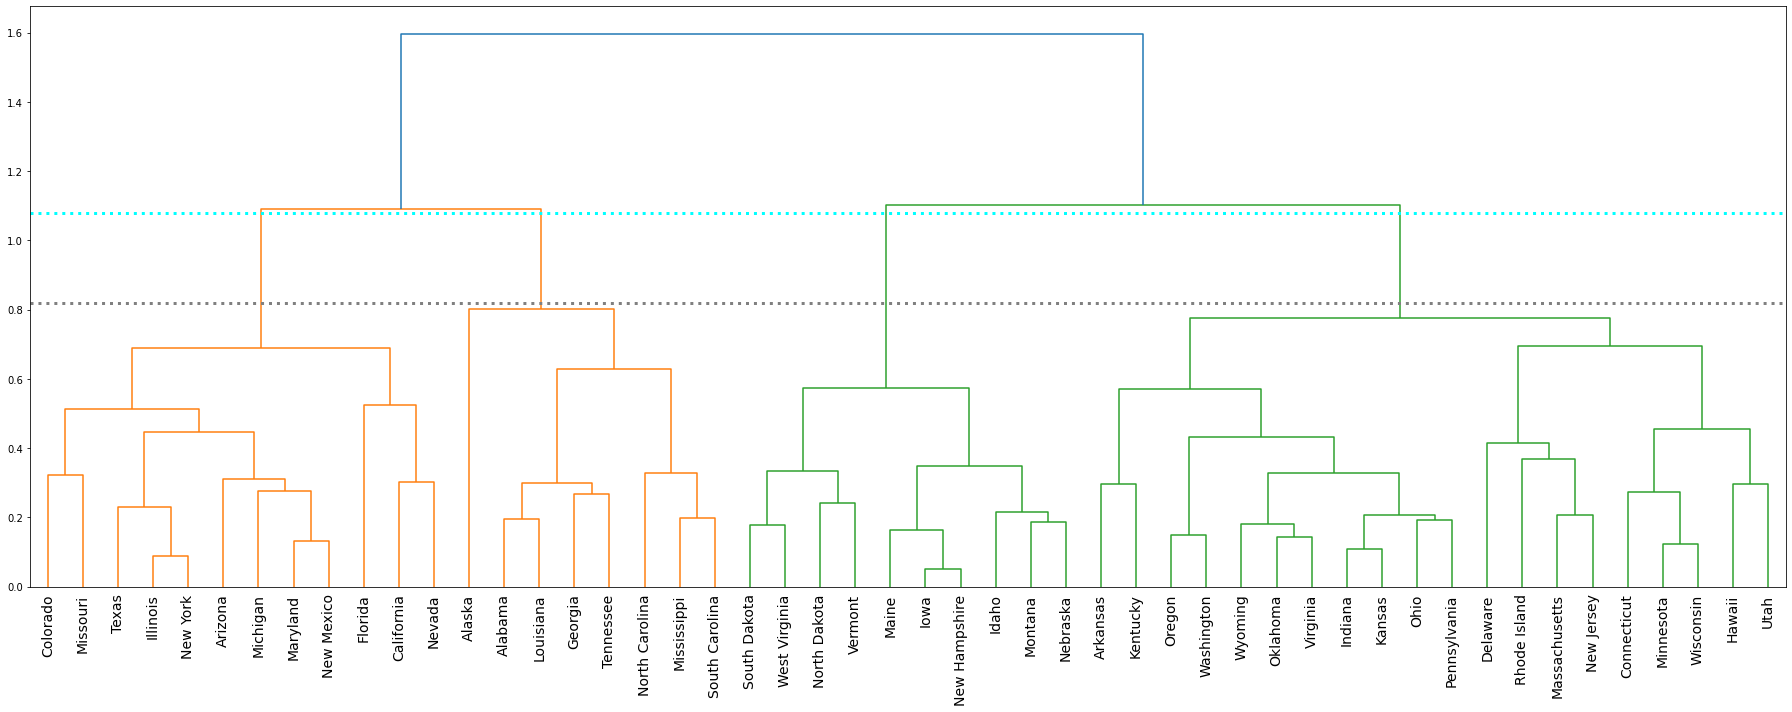

In [13]:
# Dendrogram
plt.figure(figsize=(25,10))
plt.axhline(y=0.82,c='gray',lw=3,linestyle=':')
plt.axhline(y=1.08,c='cyan',lw=3,linestyle=':')
dendrogram=sch.dendrogram(sch.linkage(norm_data,method='complete'),orientation='top',labels=data.index,leaf_font_size=14)
plt.tight_layout()

In [14]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [15]:
hc.fit(norm_data)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [16]:
y_hc=hc.fit_predict(norm_data)

In [17]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [18]:
data['H_Cluster_ID']=y_hc

In [19]:
data

,Murder,Assault,UrbanPop,Rape,H_Cluster_ID
State,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,3


In [20]:
data1=data.sort_values('H_Cluster_ID')
data1.iloc[:,[-1]]

,H_Cluster_ID
State,
Alabama,0
Louisiana,0
Mississippi,0
North Carolina,0
South Carolina,0
Georgia,0
Alaska,0
Tennessee,0
Utah,1


In [21]:
data=data.drop(['H_Cluster_ID'],axis=1)

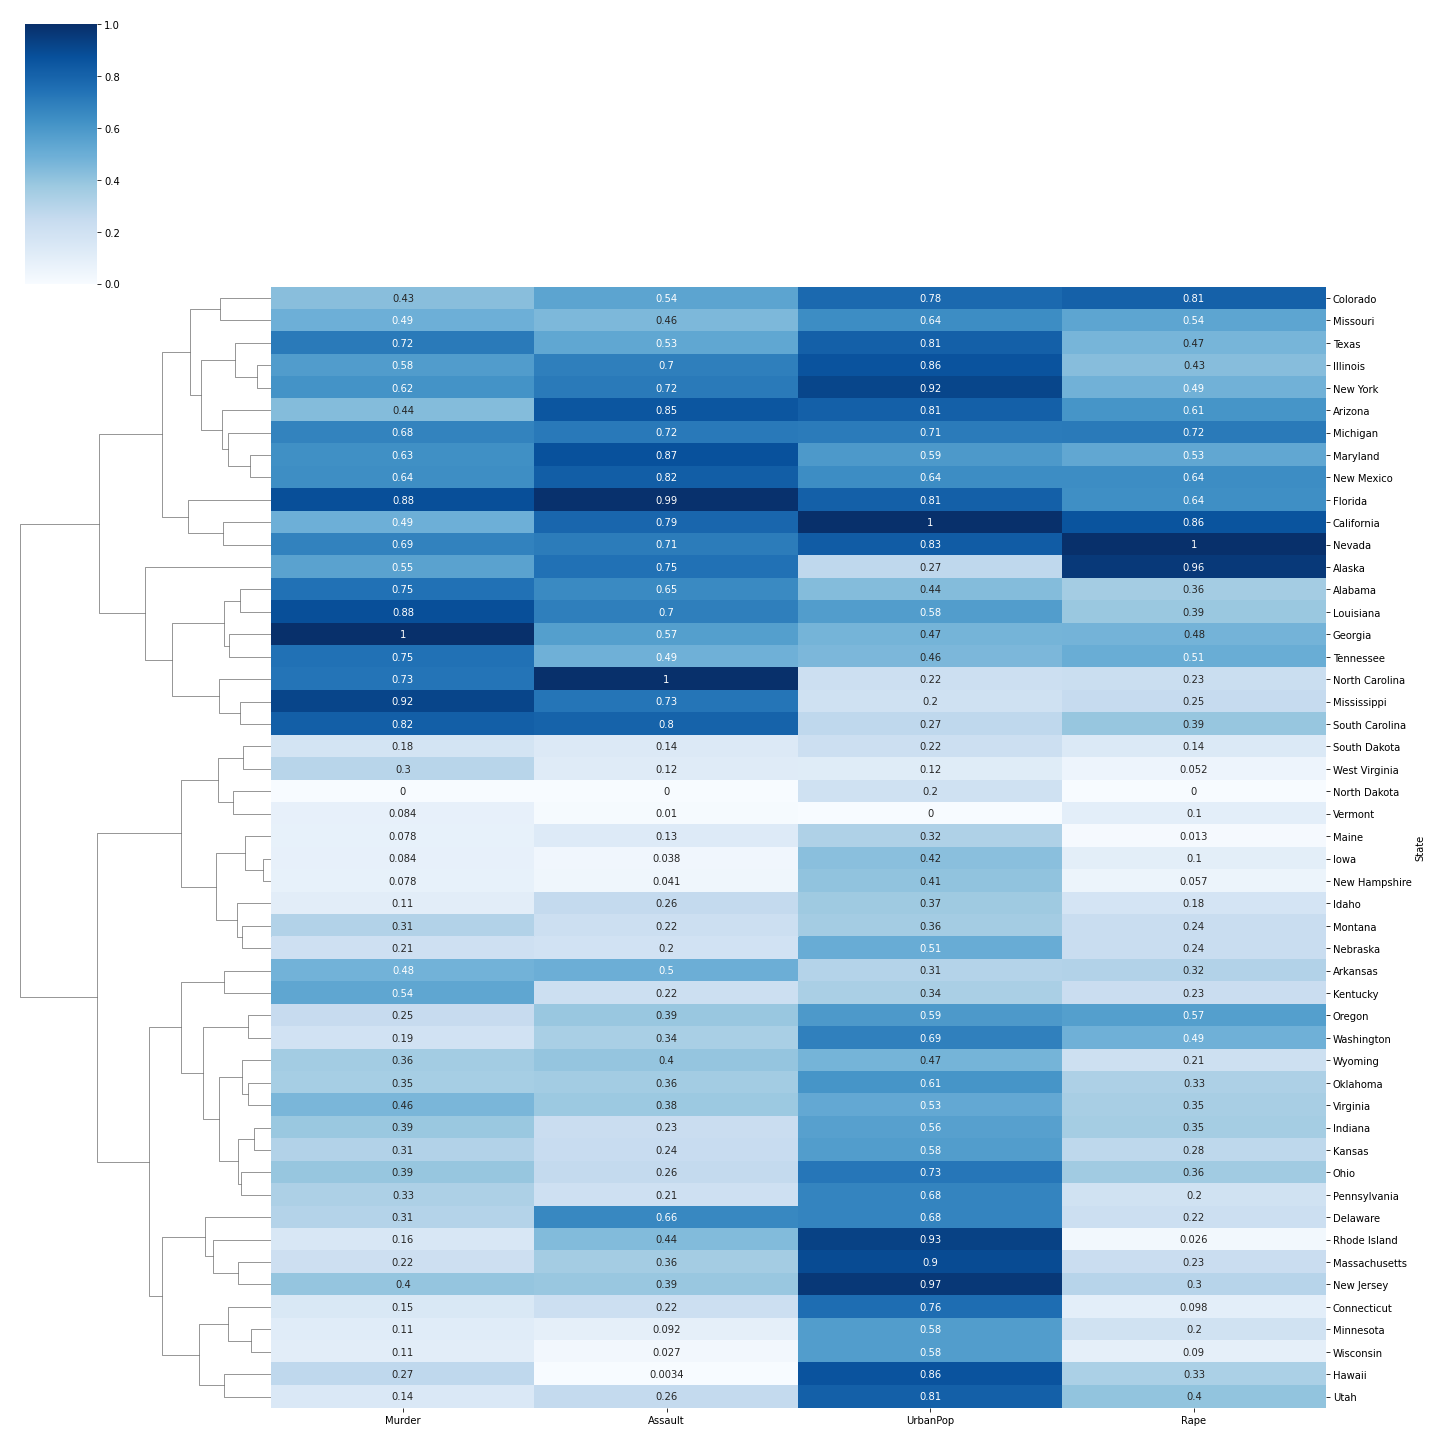

In [22]:
# Plotting clustermap with Euclidean Distance and Method of linkage in complete.

sns.clustermap(data,metric='euclidean',standard_scale=1,method='complete',cmap='Blues',col_cluster=False,annot=True,figsize=(20,20));

# ***K-Means Clustering***

In [23]:
# Importing Libraries for K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples

In [24]:
crime_df=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Means-Clustering/main/crime_data.csv")

In [25]:
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
crime_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [27]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [28]:
# We will scale our data

scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crime_df.iloc[:,1:])

In [29]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [30]:
X=scaled_crime_df

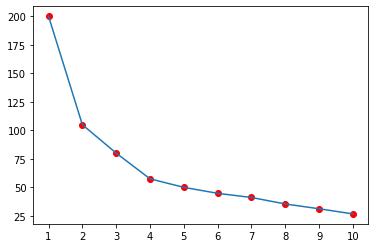

In [31]:
# Plotting the Elbow-Graph

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='r')
plt.xticks(range(1,11))
plt.show()

In [32]:
# Now for Number Of Clusters=5, we see to which all clusters they fit in.

clustered=KMeans(n_clusters=5,init='k-means++',random_state=10)
clustered.fit(X)

KMeans(n_clusters=5, random_state=10)

In [33]:
clustered.labels_

array([0, 2, 2, 1, 2, 2, 4, 1, 2, 0, 4, 3, 2, 1, 3, 1, 1, 0, 3, 2, 4, 2,
       3, 0, 1, 3, 1, 2, 3, 4, 2, 2, 0, 3, 1, 1, 1, 1, 4, 0, 3, 0, 2, 4,
       3, 1, 1, 3, 3, 1], dtype=int32)

In [34]:
clustered.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.22748551, -0.30098674, -0.01276108, -0.10667779],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.11467476, -1.17725513, -1.00201665, -1.05938813],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482]])

In [35]:
crime_df['Clusters_ID']=clustered.labels_

In [36]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [37]:
crime_df.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [38]:
crime_df

,State,Murder,Assault,UrbanPop,Rape,Clusters_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [39]:
crime_df.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'Clusters_ID'], dtype='object')

In [40]:
crime_df.shape

(50, 6)

In [41]:
crime_df.groupby('Clusters_ID').agg(['mean']).reset_index()

,Clusters_ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.671429,251.285714,54.285714,21.685714
1,1,6.807143,145.928571,65.357143,20.242857
2,2,10.966667,264.000000,76.500000,33.608333
3,3,2.981818,73.636364,51.181818,11.409091
4,4,4.500000,126.333333,83.500000,16.266667


In [42]:
for i in np.array([0,1,2,3,4]):
  print('Cities that belong to Cluster Index',i)
  print(crime_df[crime_df['Clusters_ID']==i])
  print('\n')

Cities that belong to Cluster Index 0
             State  Murder  Assault  UrbanPop  Rape  Clusters_ID
0          Alabama    13.2      236        58  21.2            0
9          Georgia    17.4      211        60  25.8            0
17       Louisiana    15.4      249        66  22.2            0
23     Mississippi    16.1      259        44  17.1            0
32  North Carolina    13.0      337        45  16.1            0
39  South Carolina    14.4      279        48  22.5            0
41       Tennessee    13.2      188        59  26.9            0


Cities that belong to Cluster Index 1
           State  Murder  Assault  UrbanPop  Rape  Clusters_ID
3       Arkansas     8.8      190        50  19.5            1
7       Delaware     5.9      238        72  15.8            1
13       Indiana     7.2      113        65  21.0            1
15        Kansas     6.0      115        66  18.0            1
16      Kentucky     9.7      109        52  16.3            1
24      Missouri     9.0

In [43]:
crime_df

,State,Murder,Assault,UrbanPop,Rape,Clusters_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [44]:
# We are now dropping the Column Clusters_ID for further examiantion.

crime_df=crime_df.drop(['Clusters_ID'],axis=1)

In [45]:
crime_df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


###  **Silhouette in Clustering**


> Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provide a succinct graphical representation of how well each pobject has been classified.

> The Silhouette value is a measure of how similar an object is to its own cluster (cohesion) compare to the other clusters (separation). The Silhouette ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters. If most objects have a high value, thenthe clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. The silhouette can be calculated with any distance metric, such as the Euclidenan distance or the Manhattan distance.



> Assume the data have been clustered via technique, k-mediods or k-means, into k clusters. For each data point $i$ in the cluster $C_I$ (data point $i$ in the cluster $C_I$) we have, 
$a(i)$= $\frac{1}{|C_I|-1}\sum_{j\in C_I, i \neq j} d(i,j)$. $a(i)$, is the mean distance between $i$ and all other data points in the same cluster. We can interpret $a(i)$ as a measure for how well $i$ is assigned to it's cluster (the smaller the value, the better the assignment).

We then define the mean dissimilarity of point $i$ to some cluster $C_J$ as the mean of the distance to all points in $C_J$ (where $C_J \neq C_I$).

For each data point $i \in C_I$, we now define

$b(i)= \min_{J \neq I} \frac{1}{|C_J|}\sum_{j \in C_J} d(i,j)$

to be the *smallest* (hence the $\min$ operator in the formula) mean distance of $i$ to all points in any cluster (i.e., in any cluster of which $i$ is not a member). The cluster with this smallest mean dissimilarity is said to be "neighbouring cluster" of $i$ because it is the next best fit cluster for point $i$.



> The Silhouette(value) of one data point $i$, $s(i)$:$s(i)=\frac{b(i)-a(i)}{\max [a(i),b(i)]}$, if $C_I > 1$ and $s(i)=0$, if $|C_I|=1$. Which can also be written as: $s(i)=1-a(i)/b(i), if$ $a(i)<b(i)$ 

> $s(i)=0, if$ $a(i)=b(i)$


> $s(i)=1-a(i)/b(i), if$ $a(i)>b(i)$.

From the above definition it is clear that $-1\leq s(i)\leq 1$
> Note that $a(i)$ is not clearly defined for clusters with size=1, in which case we set $s(i)=0$. This choice is arbitrary, but neutral in the sense that it is at the midpoint of the bounds -1 and 1.

In [46]:
# Now let us consider the range of clusters.

range_n_clusters=[3,4,5,6]

## **Features are *Urban Population* and *Assault*.**

For n_clusters= 3 The average Silhouette_score is : 0.30813622648945616
For n_clusters= 4 The average Silhouette_score is : 0.33968891433344395
For n_clusters= 5 The average Silhouette_score is : 0.3133544326927289
For n_clusters= 6 The average Silhouette_score is : 0.29675212802432493


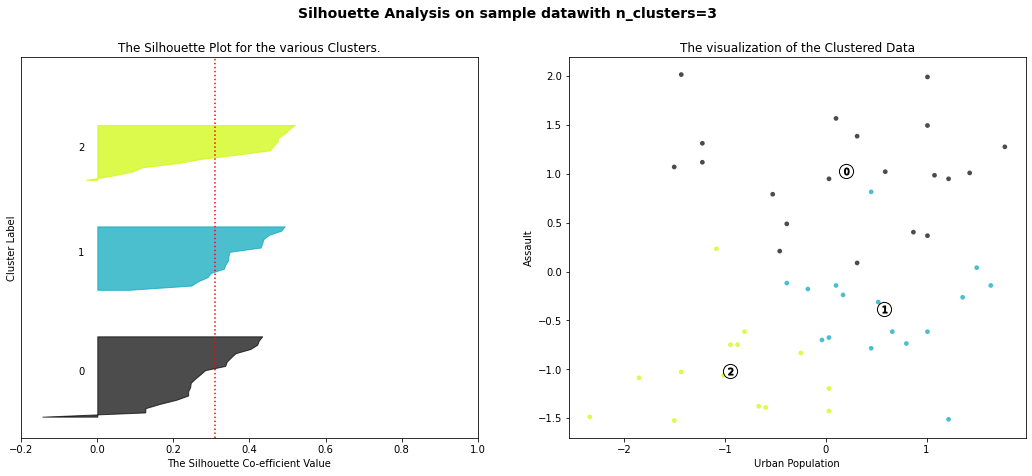

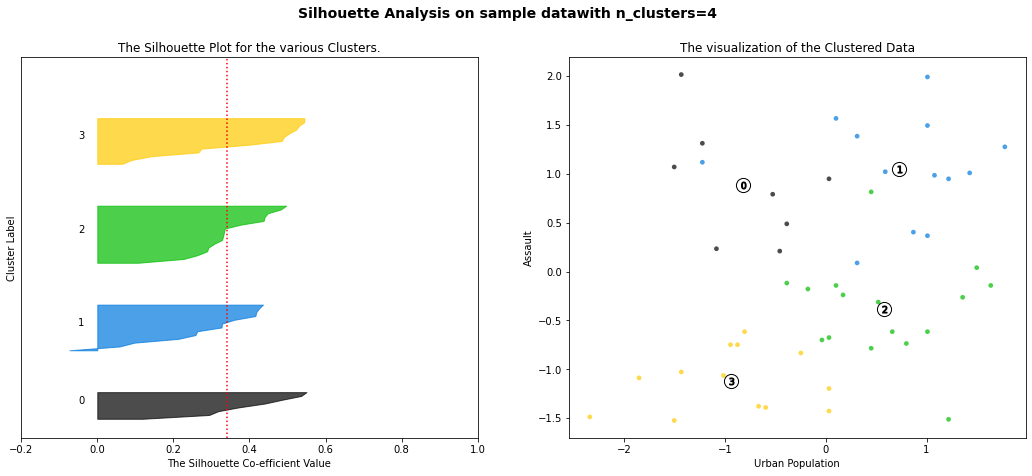

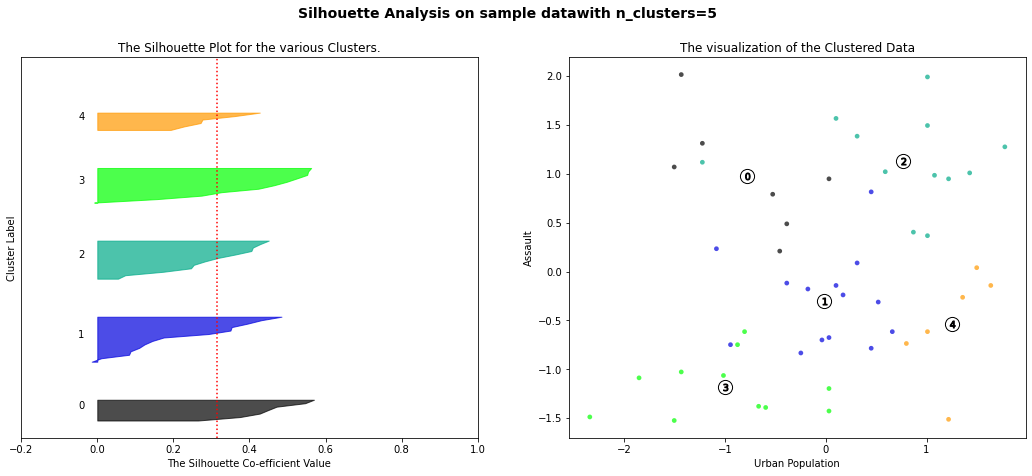

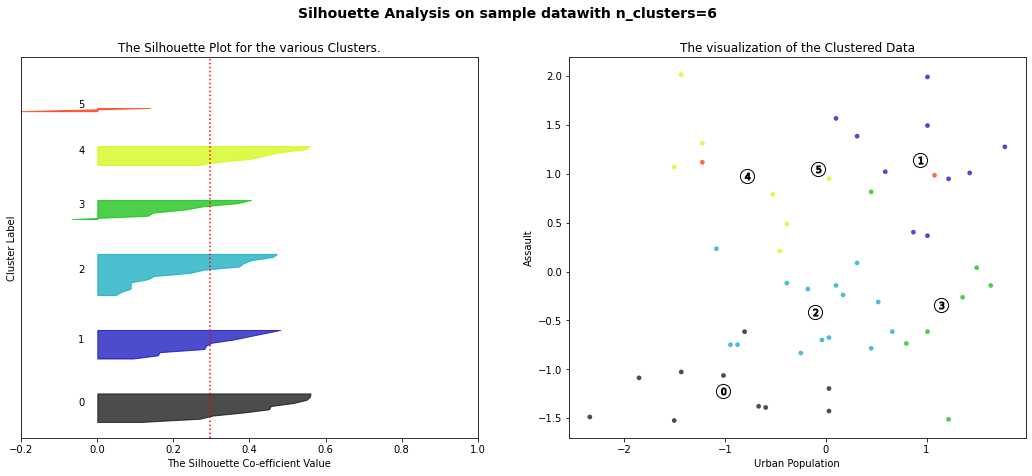

In [47]:
# Now plotting the Silhouette Score along with the clusters
# Now Plotting the Silhouette score along with clusters for Different Columns/Features.

for n_clusters in range_n_clusters:
  fig,(ax1,ax2)=plt.subplots(1,2) # Creating a subplot with 1 row and 2 columns
  fig.set_size_inches(18,7)

  # The 1st Subplot is the Silhouette plot
  # The Silhouette co-efficient can range from -1 to +1.
  ax1.set_xlim([-0.1,1]) 
   
  # Here (n_clusters+1)*10 is for inserting blank space between Silhouette plots of individual Cluster, to demarcate them correctly. 
  ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

  # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
  clustered=KMeans(n_clusters=n_clusters,random_state=10,init='k-means++')
  clustered_labels=clustered.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into density and separation of the formed clusters.
  silhouette_avg=silhouette_score(X,clustered_labels)
  print("For n_clusters=",n_clusters,"The average Silhouette_score is :",silhouette_avg)

  # Compute Silhouette score for each sample
  sample_silhouette_values=silhouette_samples(X,clustered_labels)

  y_lower=5
  
  for i in range(n_clusters):
    # 
    ith_cluster_silhouette_values= sample_silhouette_values[clustered_labels==i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i=ith_cluster_silhouette_values.shape[0]

    y_upper=y_lower+size_cluster_i

    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

    # Label Silhouette Plots with their cluster number at the middle
    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    # Compute the new y_lower for the next plot.
    y_lower=y_upper+10  # 10 for the 0 samples.

  ax1.set_title("The Silhouette Plot for the various Clusters.")
  ax1.set_xlabel("The Silhouette Co-efficient Value")
  ax1.set_ylabel("Cluster Label")

  # The vertical  line for the average silhouette for all the values.
  ax1.axvline(x=silhouette_avg,color='red',linestyle=":")

  ax1.set_yticks([]) # Clear all the y-axis labels/ticks.
  ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

  # 2nd plot showing the actual clusters formed.

  colors=cm.nipy_spectral(clustered_labels.astype(float)/n_clusters)
  ax2.scatter(X[:,2],X[:,1],marker='.',s=90,lw=0,alpha=0.7,color=colors,edgecolor='k') # Here Our Features/Columns are Urban Population and Assault

  # Labelling the clusters.
  centers=clustered.cluster_centers_
  
  # Draw a white circles at cluster center.
  ax2.scatter(centers[:,2],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[2],c[1],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the Clustered Data")
  ax2.set_xlabel("Urban Population")
  ax2.set_ylabel("Assault")
  
  plt.suptitle(("Silhouette Analysis on sample data" "with n_clusters=%d")% n_clusters,fontsize=14,fontweight='bold')
plt.show()

## **Features are *Urban Population* and *Rape*.**

For n_clusters= 3 The average Silhouette_score is : 0.30813622648945616
For n_clusters= 4 The average Silhouette_score is : 0.33968891433344395
For n_clusters= 5 The average Silhouette_score is : 0.3133544326927289
For n_clusters= 6 The average Silhouette_score is : 0.29675212802432493


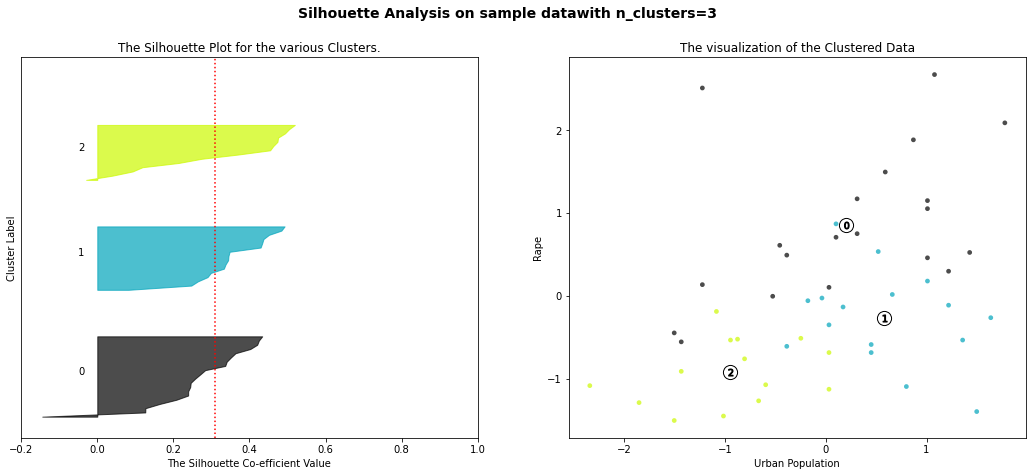

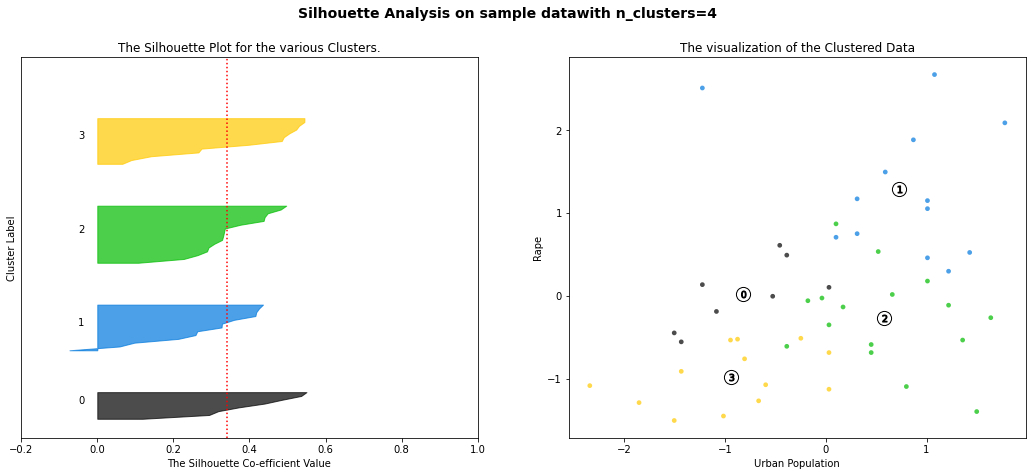

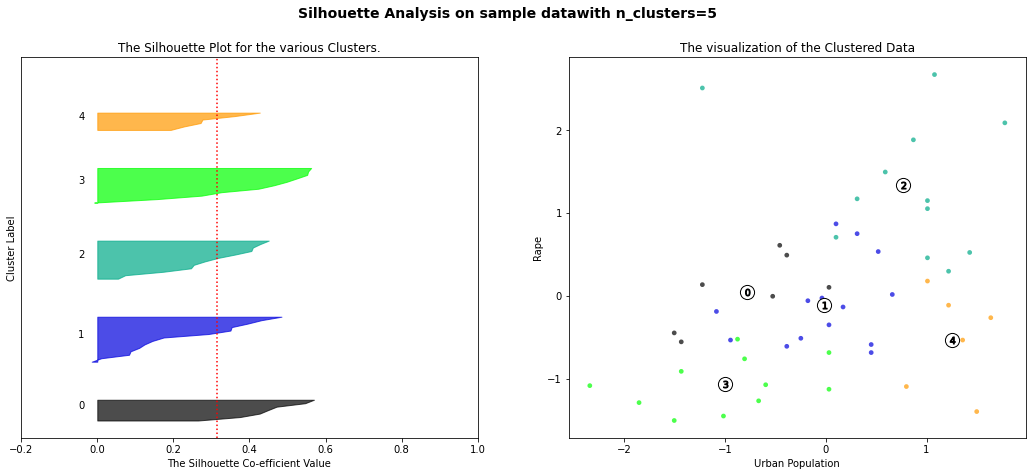

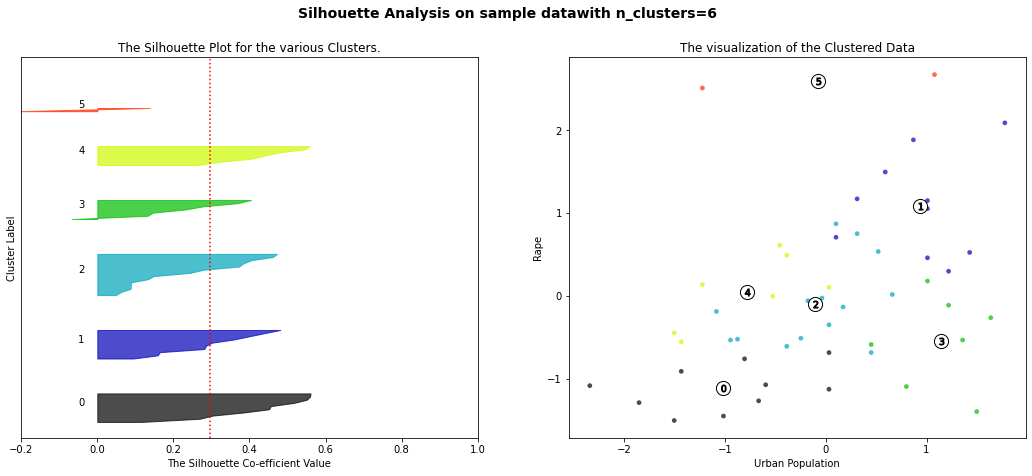

In [48]:
for n_clusters in range_n_clusters:
  fig,(ax1,ax2)=plt.subplots(1,2)
  fig.set_size_inches(18,7)



  ax1.set_xlim([-0.1,1]) 
  ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

  clustered=KMeans(n_clusters=n_clusters,random_state=10,init='k-means++')
  clustered_labels=clustered.fit_predict(X)

  silhouette_avg=silhouette_score(X,clustered_labels)
  print("For n_clusters=",n_clusters,"The average Silhouette_score is :",silhouette_avg)

  sample_silhouette_values=silhouette_samples(X,clustered_labels)

  y_lower=5
  
  for i in range(n_clusters):
    ith_cluster_silhouette_values=\
    sample_silhouette_values[clustered_labels==i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i

    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    y_lower=y_upper+10

  ax1.set_title("The Silhouette Plot for the various Clusters.")
  ax1.set_xlabel("The Silhouette Co-efficient Value")
  ax1.set_ylabel("Cluster Label")

  ax1.axvline(x=silhouette_avg,color='red',linestyle=":")

  ax1.set_yticks([])
  ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])


  colors=cm.nipy_spectral(clustered_labels.astype(float)/n_clusters)

  ax2.scatter(X[:,2],X[:,3],marker='.',s=90,lw=0,alpha=0.7,color=colors,edgecolor='k') # Here Our Features/Columns are Urban Population and Rape.

  centers=clustered.cluster_centers_
  
  ax2.scatter(centers[:,2],centers[:,3],marker='o',c='white',alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[2],c[3],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the Clustered Data")
  ax2.set_xlabel("Urban Population")
  ax2.set_ylabel("Rape")
  
  plt.suptitle(("Silhouette Analysis on sample data" "with n_clusters=%d")% n_clusters,fontsize=14,fontweight='bold')
plt.show()

## **Features are *Urban Population* and *Murder*.**

For n_clusters= 3 The average Silhouette_score is : 0.30813622648945616
For n_clusters= 4 The average Silhouette_score is : 0.33968891433344395
For n_clusters= 5 The average Silhouette_score is : 0.3133544326927289
For n_clusters= 6 The average Silhouette_score is : 0.29675212802432493


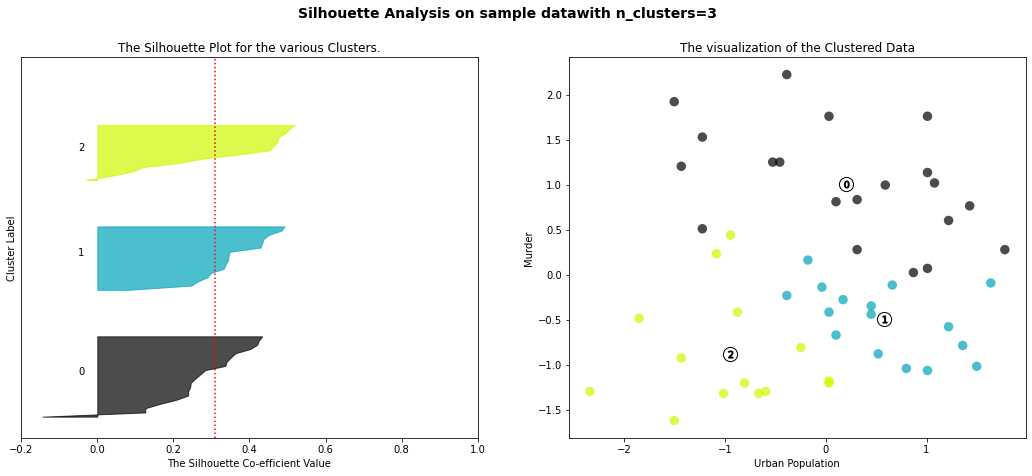

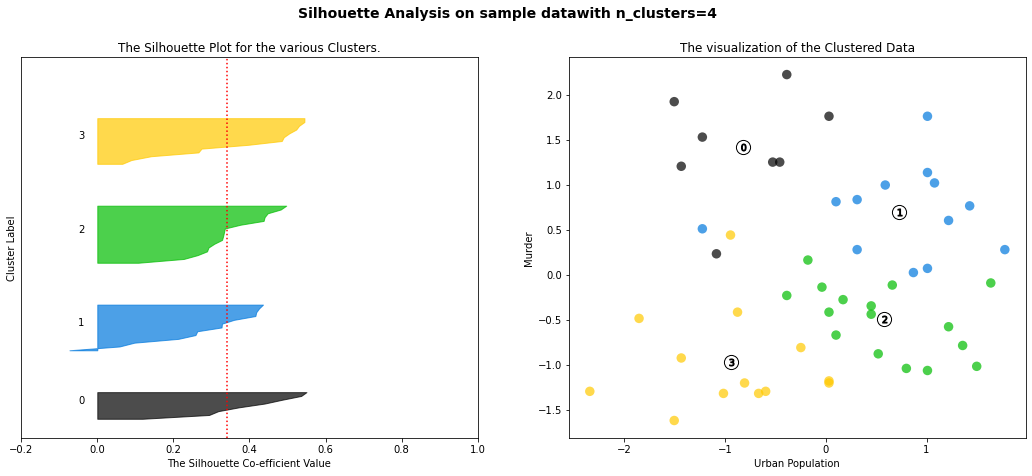

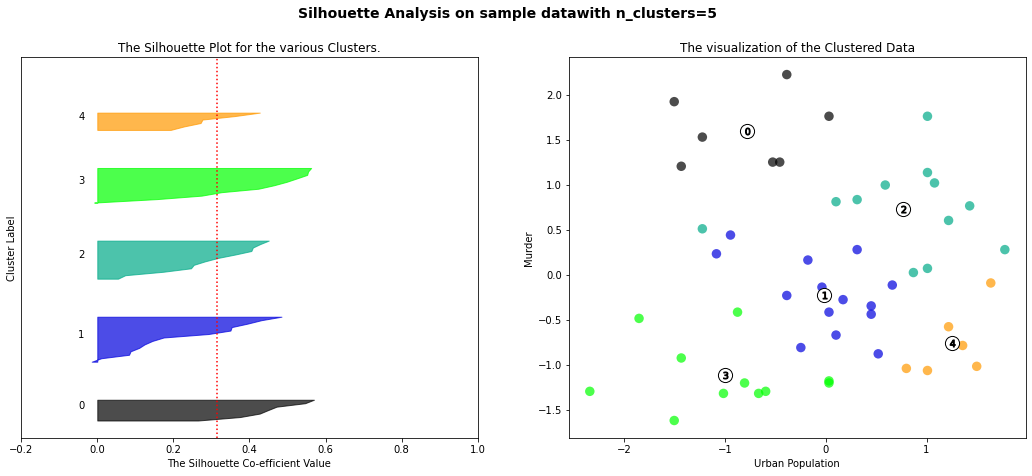

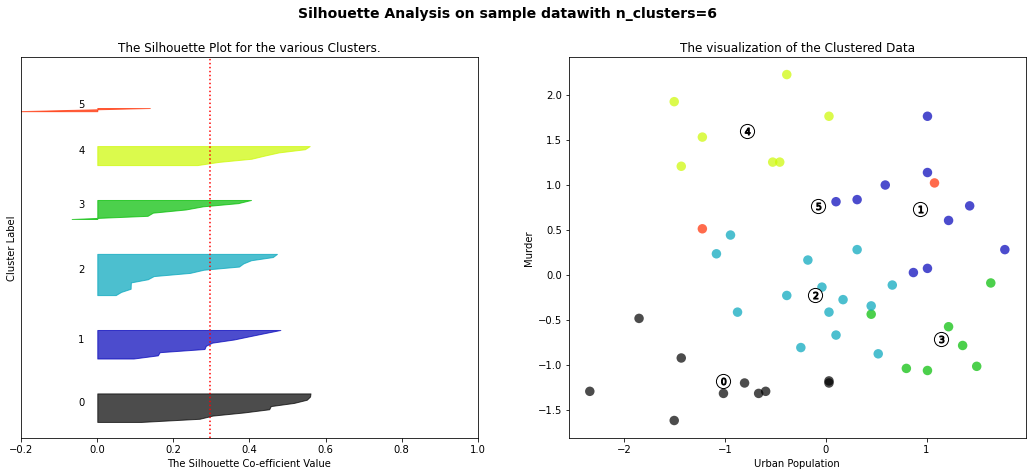

In [49]:
for n_clusters in range_n_clusters:
  fig,(ax1,ax2)=plt.subplots(1,2)
  fig.set_size_inches(18,7)



  ax1.set_xlim([-0.1,1]) 
  ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

  clustered=KMeans(n_clusters=n_clusters,random_state=10,init='k-means++')
  clustered_labels=clustered.fit_predict(X)

  silhouette_avg=silhouette_score(X,clustered_labels)
  print("For n_clusters=",n_clusters,"The average Silhouette_score is :",silhouette_avg)

  sample_silhouette_values=silhouette_samples(X,clustered_labels)

  y_lower=5
  
  for i in range(n_clusters):
    ith_cluster_silhouette_values=\
    sample_silhouette_values[clustered_labels==i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i

    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))

    y_lower=y_upper+10

  ax1.set_title("The Silhouette Plot for the various Clusters.")
  ax1.set_xlabel("The Silhouette Co-efficient Value")
  ax1.set_ylabel("Cluster Label")

  ax1.axvline(x=silhouette_avg,color='red',linestyle=":")

  ax1.set_yticks([])
  ax1.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])


  colors=cm.nipy_spectral(clustered_labels.astype(float)/n_clusters)

  ax2.scatter(X[:,2],X[:,0],marker='o',s=90,lw=0,alpha=0.7,color=colors,edgecolor='k') # Here Our Features/Columns are Urban Population and Rape.

  centers=clustered.cluster_centers_
  
  ax2.scatter(centers[:,2],centers[:,0],marker='o',c='white',alpha=1,s=200,edgecolor='k')

  for i,c in enumerate(centers):
    ax2.scatter(c[2],c[0],marker='$%d$'%i,alpha=1,s=50,edgecolor='k')

  ax2.set_title("The visualization of the Clustered Data")
  ax2.set_xlabel("Urban Population")
  ax2.set_ylabel("Murder")
  
  plt.suptitle(("Silhouette Analysis on sample data" "with n_clusters=%d")% n_clusters,fontsize=14,fontweight='bold')
plt.show()

## **Using Heat-Map to find the Silhouette Score.**

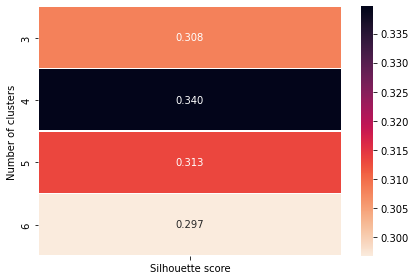

In [50]:
# Plotting Heat-Map for Silhouette Score

results=[]

for n_clusters in range_n_clusters:
  clustered=KMeans(n_clusters=n_clusters,init='k-means++',random_state=10)
  clustered_labels=clustered.fit_predict(X)
  silhouette_avg=silhouette_score(X,clustered_labels)
  results.append([n_clusters,silhouette_avg])

results=pd.DataFrame(results,columns=["Number of clusters","Silhouette score"])
pivot_km=pd.pivot_table(results,index="Number of clusters",values="Silhouette score")

plt.figure()
sns.heatmap(pivot_km,annot=True,linewidths=0.5,fmt='0.3f',cmap=sns.cm.rocket_r)
plt.tight_layout()

In [51]:
# Now fitting our model so that we get 4 clusters.

clustered=KMeans(n_clusters=4,init='k-means++',random_state=10)
clustered.fit(X)

KMeans(n_clusters=4, random_state=10)

In [52]:
clustered.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [53]:
clustered.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [54]:
crime_df['Clusters_ID']=clustered.labels_

In [55]:
crime_df.groupby('Clusters_ID').agg(['mean']).reset_index()

,Clusters_ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,10.815385,257.384615,76.000000,33.192308
2,2,5.656250,138.875000,73.875000,18.781250
3,3,3.600000,78.538462,52.076923,12.176923


In [56]:
for i in  np.array([0,1,2,3]):
  print('Cities that belong to Cluster Index',i)
  print(crime_df[crime_df['Clusters_ID']==i])
  print('\n')

Cities that belong to Cluster Index 0
             State  Murder  Assault  UrbanPop  Rape  Clusters_ID
0          Alabama    13.2      236        58  21.2            0
3         Arkansas     8.8      190        50  19.5            0
9          Georgia    17.4      211        60  25.8            0
17       Louisiana    15.4      249        66  22.2            0
23     Mississippi    16.1      259        44  17.1            0
32  North Carolina    13.0      337        45  16.1            0
39  South Carolina    14.4      279        48  22.5            0
41       Tennessee    13.2      188        59  26.9            0


Cities that belong to Cluster Index 1
         State  Murder  Assault  UrbanPop  Rape  Clusters_ID
1       Alaska    10.0      263        48  44.5            1
2      Arizona     8.1      294        80  31.0            1
4   California     9.0      276        91  40.6            1
5     Colorado     7.9      204        78  38.7            1
8      Florida    15.4      335 

In [57]:
crime_df.describe()

,Murder,Assault,UrbanPop,Rape,Clusters_ID
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,1.680000
std,4.35551,83.337661,14.474763,9.366385,1.038838
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,1.000000
50%,7.25000,159.000000,66.000000,20.100000,2.000000
75%,11.25000,249.000000,77.750000,26.175000,2.750000
max,17.40000,337.000000,91.000000,46.000000,3.000000


## ***DBSCAN***

In [58]:
# Importing libraries for DBSCAN

from sklearn.cluster import DBSCAN

In [59]:
crime_df=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Means-Clustering/main/crime_data.csv")

In [60]:
crime_df.rename(columns={'Unnamed: 0':'State'},inplace=True)

In [61]:
crime_df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [62]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [63]:
crime_df0=crime_df.iloc[:,[0]]
crime_df1=crime_df.iloc[:,1:]

In [64]:
array=crime_df1.values

In [65]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [66]:
# Standardising the data

stdscaler=StandardScaler()
X=stdscaler.fit_transform(array)

In [67]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [68]:
# Using DBSCAN to detect outliers

dbscan=DBSCAN(eps=1,min_samples=3)

dbscan.fit_predict(X)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [69]:
cluster=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [70]:
cluster

,Cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [71]:
clustered=pd.concat([crime_df1,cluster],axis=1)

In [72]:
clustered

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [73]:
crime_df0

,State
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [74]:
clustered=pd.concat([clustered,crime_df0],axis=1)

In [75]:
clustered

,Murder,Assault,UrbanPop,Rape,Cluster,State
0,13.2,236,58,21.2,0,Alabama
1,10.0,263,48,44.5,-1,Alaska
2,8.1,294,80,31.0,-1,Arizona
3,8.8,190,50,19.5,-1,Arkansas
4,9.0,276,91,40.6,-1,California
5,7.9,204,78,38.7,-1,Colorado
6,3.3,110,77,11.1,1,Connecticut
7,5.9,238,72,15.8,-1,Delaware
8,15.4,335,80,31.9,-1,Florida
9,17.4,211,60,25.8,0,Georgia


In [76]:
# Noisy points of the data

clustered[clustered['Cluster']==-1]

,Murder,Assault,UrbanPop,Rape,Cluster,State
1,10.0,263,48,44.5,-1,Alaska
2,8.1,294,80,31.0,-1,Arizona
3,8.8,190,50,19.5,-1,Arkansas
4,9.0,276,91,40.6,-1,California
5,7.9,204,78,38.7,-1,Colorado
7,5.9,238,72,15.8,-1,Delaware
8,15.4,335,80,31.9,-1,Florida
10,5.3,46,83,20.2,-1,Hawaii
27,12.2,252,81,46.0,-1,Nevada
32,13.0,337,45,16.1,-1,North Carolina


In [77]:
noise_df=clustered[clustered['Cluster']==-1]

In [78]:
for x in list(noise_df.iloc[:,-1]):
  print(x)

Alaska
Arizona
Arkansas
California
Colorado
Delaware
Florida
Hawaii
Nevada
North Carolina


In [79]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
Cluster       0.660
dtype: float64